# Puffin

This is my from-scratch implementation of linear regression in Python. It is part of my effort to touch up on stuff I learned in school and hopefully improve as well.

## Logistic Regression

I honestly don't have a great understanding of all of the components of this. I just know you can just put every data point into an equation - which I think is usually called least-squares. In school, we were taught ordinary least-squares (OLS), which you can just solve. There is no "training" required in this algorithm. It's just "put things through equation" and then "make predictions". It is clear from the name that this is a linear algorithm that performs regression. Just to clarify, regression is continuous classification - in other words, classification is discrete regression. I love this fact for some reason. An example use case for linear regression might be predicting weights from height. The simplest form of linear regression takes one input variable and predicts an output variable.

In this notebook, I would like to implement linear regression as well as multiple linear regression (which is linear regression but with multiple input variables).

Hopefully, because of the simplicity of linear regression, this notebook is a quick and simple one.

### References

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
plt.style.use('Solarize_Light2')

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Data Loading and Cleaning

The dataset I chose is [this one](https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset). Frankly, I just googled "linear regression dataset" and this was the first result that popped up in Kaggle results. It is perfect for linear regression. The dataset has two columns: experience in months and salary in thousands. Extremely simple.

In [3]:
df = pd.read_csv("data/Experience-Salary.csv")

df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [6]:
df.columns = ['exp', 'sal']

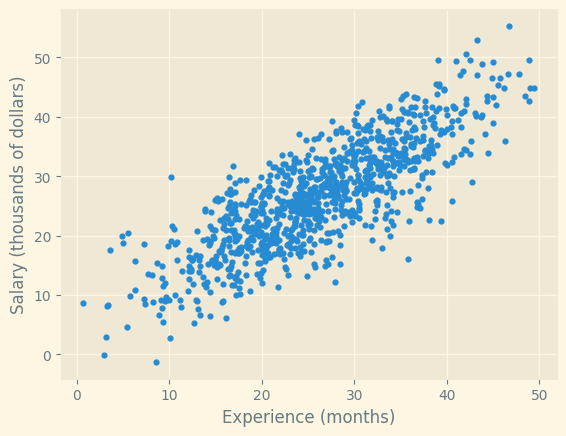

In [7]:
plt.scatter(df['exp'], df['sal'], s=12);

plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousands of dollars)')

plt.show()

As expected, there is clearly some correlation between experience and salary.

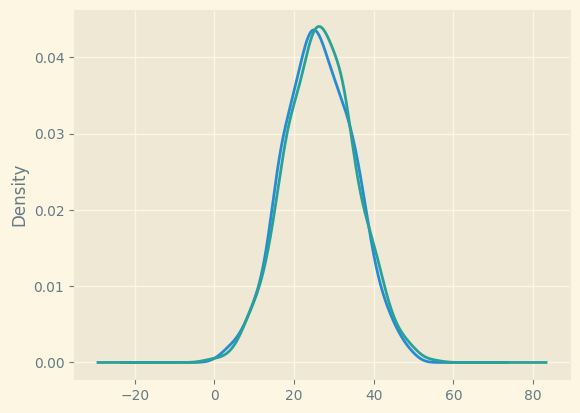

In [8]:
df['exp'].plot(kind="kde")
df['sal'].plot(kind="kde");

...Extremely similar distributions...

In [9]:
max = df['exp'].max()
min = df['exp'].min()

# min-max normalization
df['exp'] = df['exp'].apply(lambda value: (value-min) / (max-min))

In [10]:
max = df['sal'].max()
min = df['sal'].min()

# min-max normalization
df['sal'] = df['sal'].apply(lambda value: (value-min) / (max-min))

In [11]:
df.describe()

,exp,sal
count,1000.000000,1000.000000
mean,0.522094,0.494914
std,0.178755,0.156341
min,0.000000,0.000000
25%,0.397329,0.385470
50%,0.516299,0.495320
75%,0.650241,0.599082
max,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exp     1000 non-null   float64
 1   sal     1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [13]:
test_size = 0.15

X_train, X_test, y_train, y_test = train_test_split(df['exp'], df['sal'], test_size=test_size, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Linear Regression

First, I will calculate the line of best fit with least squares. The equation I implement is:

# $m = \frac{  \sum{(x-\overline{x})(y-\overline{y})}  }{   \sum{ ( x - \overline{ x } ) ^2 }  }$

In [14]:
# Calculate the mean of X and Y

mean_x = np.mean(X_train)
mean_y = np.mean(y_train)

# number of values
N = len(X_train)

numerator = 0
denominator = 0

for i in range(N):
    numerator += (X_train[i] - mean_x) * (y_train[i] - mean_y)
    denominator += (X_train[i] - mean_x) ** 2

m = numerator / denominator
c = mean_y - (m * mean_x)

print(m, c)

0.7140952049818593 0.12183423258615989


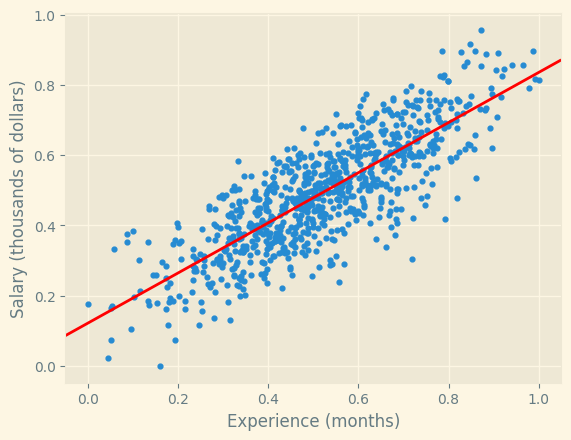

In [15]:
plt.axline((0, c), slope=m, color='red')
plt.scatter(X_train, y_train, s=12);

plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousands of dollars)')

plt.show()

Actually looks great. Let's test its accuracy on the testing set.

In [16]:
total_err = 0

# make a prediction for each point in test set
for i in range(len(X_train)):
    x_i = X_train[i]
    y_i = y_train[i]
    y_prime = m * x_i + c
    
    # store the squared difference between real and predicted
    total_err += (y_i - y_prime) ** 2
    
# average the difference
print(f'Average error for train set is {total_err / len(X_train)}')

Average error for train set is 0.008347028381766718


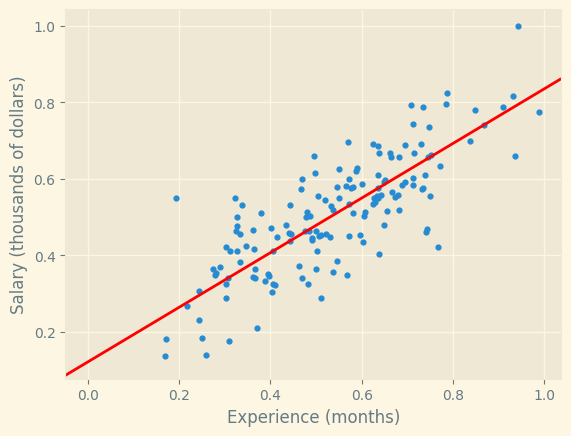

In [17]:
plt.axline((0, c), slope=m, color='red')
plt.scatter(X_test, y_test, s=12);

plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousands of dollars)')

plt.show()

In [18]:
total_err = 0

# make a prediction for each point in test set
for i in range(len(X_test)):
    x_i = X_test[i]
    y_i = y_test[i]
    y_prime = m * x_i + c
    
    # store the squared difference between real and predicted
    total_err += (y_i - y_prime) ** 2
    
# average the difference
avg_err = total_err / len(X_test)
print(f'Average error for test set is {avg_err}')

Average error for test set is 0.00843256246189119


Error is only very slightly higher on training than on test set. I believe this is actually a very strong error number. To understand this error a bit better, I'm going to plot lines on both sides of the line of best fit whose distance from the line of best fit is the error value.

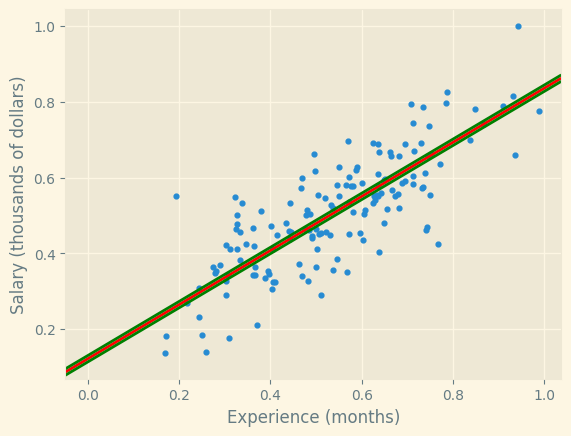

In [19]:
plt.axline((0, c), slope=m, color='r')
plt.axline((0, c+avg_err), slope=m, color='g')
plt.axline((0, c-avg_err), slope=m, color='g')
plt.scatter(X_test, y_test, s=12);

plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousands of dollars)')

plt.show()

I'm not sure if this is actually an accurate representation of how well it's predicting outputs.

> UPDATE: It's definitely not. I squared the differences. Any time these differences are decimals, they will get smaller when squared. Silly me...here is the updated graph that takes the square root of the error.

Square root of avg_err is 0.09182898486802078


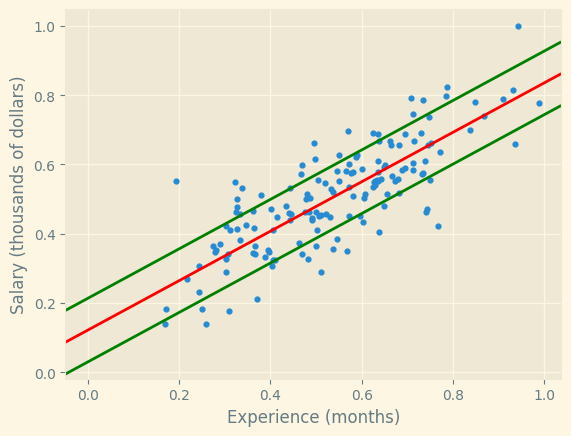

In [20]:
print(f'Square root of avg_err is {np.sqrt(avg_err)}')

plt.axline((0, c), slope=m, color='r')
plt.axline((0, c+np.sqrt(avg_err)), slope=m, color='g')
plt.axline((0, c-np.sqrt(avg_err)), slope=m, color='g')
plt.scatter(X_test, y_test, s=12);

plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousands of dollars)')

plt.show()

This looks a LOT more reasonable! HOWEVER, I still don't know if this is mathematically accurate.

## $ (x + y)^2 \neq x^2 + y^2 $

## $ (x + y)^2 = x^2 + 2xy + y^2 $
 
## $ \sqrt{x^2 + y^2} \neq \sqrt{(x+y)^2} $

All of those are true I think, but is this true:

## $ \frac{\sqrt{x^2 + y^2}}{2} = \frac{|x|+|y|}{2}  $

Each of these identities or rules or whatever seem to be related to the problem. I have a feeling the last one is not true. We can actually just test this right now.

In [21]:
total_err = 0

# make a prediction for each point in test set
for i in range(len(X_test)):
    x_i = X_test[i]
    y_i = y_test[i]
    y_prime = m * x_i + c
    
    # store the squared difference between real and predicted
    total_err += np.abs((y_i - y_prime))
    
# average the difference
avg_err = total_err / len(X_test)
print(f'Average error for test set is {avg_err}')

Average error for test set is 0.0724203935687344


Evidently, this value is different.

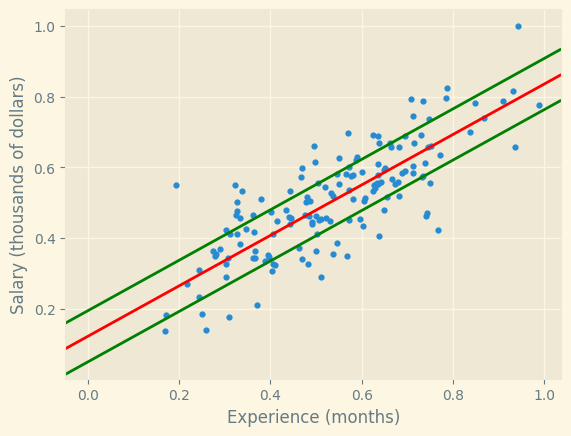

In [22]:
plt.axline((0, c), slope=m, color='r')
plt.axline((0, c+avg_err), slope=m, color='g')
plt.axline((0, c-avg_err), slope=m, color='g')
plt.scatter(X_test, y_test, s=12);

plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousands of dollars)')

plt.show()

### Doing it with SciKit Learn

While I think implementing these algorithms from scratch with the help of only Numpy, it's certainly also beneficial to know how to do it practically. I think the value of writing these algorithms from scratch is that you gain a better intuition for how they work and I think struggling through writing it and understanding it (as opposed to just using the `sklearn` method) causes the knowledge to form more strongly in your brain.

However, in a real-world situation, you're rarely going to be implementing these algorithms from scratch. I know for sure Numpy outsources the processing work of many operations to the C programming language, which makes it significantly faster. The best example I know of is using the `np.vectorize(func)` function. This can turn a `for` loop into a function that can be applied to an entire array. It is noticeably faster than a `for` loop because it runs in C instead of Python. What I'm getting at is that I'm guessing many other libraries follow this practice and are more optimized than any Python code I could write.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

reg = reg.fit(X_train.reshape(-1, 1), y_train)

y_prime = reg.predict(X_test.reshape(-1, 1))

r2_score = reg.score(X_test.reshape(-1,1), y_test)

print(r2_score);

0.6279032844487576


Nice! I have no idea what this means.